<a href="https://colab.research.google.com/github/Saptasindhu07/Clustering-Techniques/blob/main/Hierarchial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
iris=datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
iris_data=pd.DataFrame(iris['data'],columns=iris['feature_names'])
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler=StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(iris_data,iris['target'],test_size=0.2,random_state=42)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

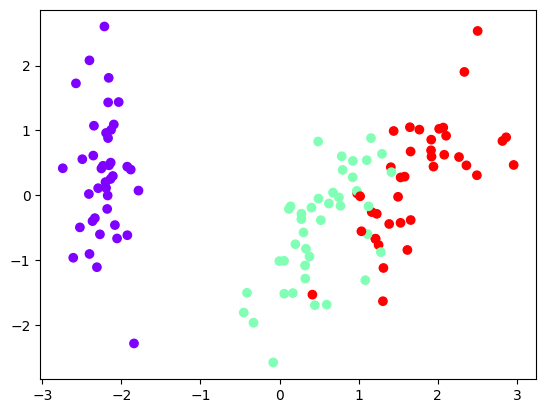

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow')

**Apply PCA and reduce the number of dimensions**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

**We will bw doing a agglomerative clustering. We need a dendogram to select the exact number of clusters**

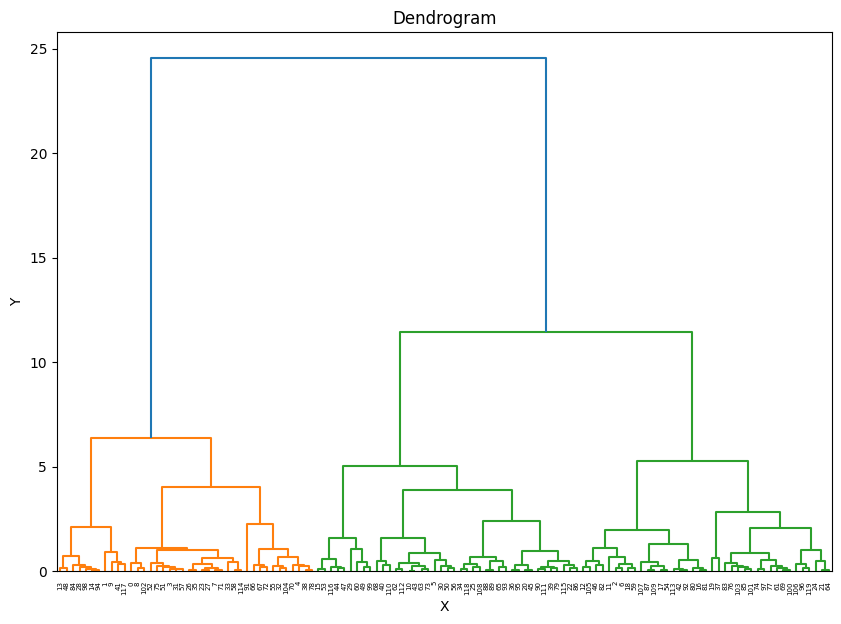

In [ ]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(10,7))
dendrogram=sc.dendrogram(sc.linkage(X_train,method='ward'))
plt.title('Dendrogram')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**We can clearly see the possibilities of 2 or 3 clusters here|**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster= AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_pred=cluster.fit_predict(X_train,y_train)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

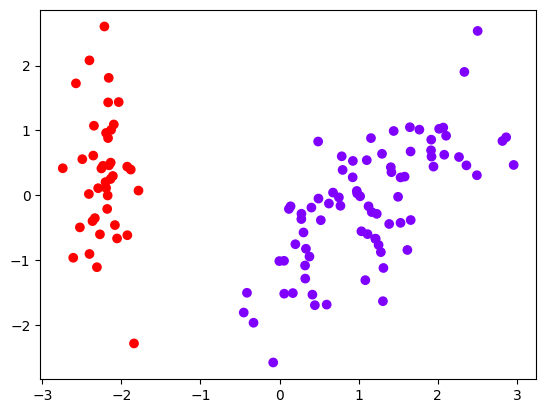

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_pred,cmap='rainbow')

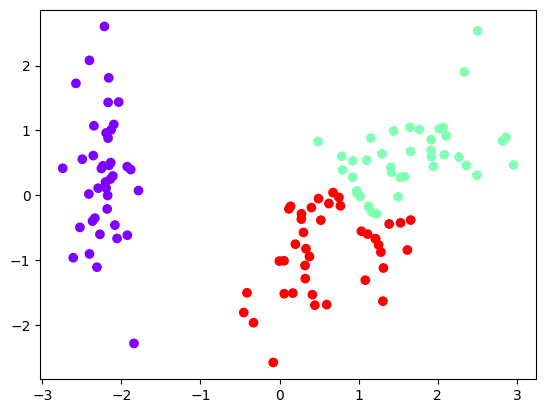

In [ ]:
cluster= AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
y_pred=cluster.fit_predict(X_train,y_train)
y_pred
plt.scatter(X_train[:,0],X_train[:,1],c=y_pred,cmap='rainbow')